In [1]:
import numpy as np

def make_image(rng, d, signal):
    a = d // 3
    X = rng.normal(0, 1, (d, d, 1))
    abnormal_x = rng.integers(0, d - a)
    abnormal_y = rng.integers(0, d - a)
    X[abnormal_x : abnormal_x + a, abnormal_y : abnormal_y + a, 0] += signal
    return X


In [2]:
d = 64
rng = np.random.default_rng(0)

X_train = []
y_train = []
for _ in range(1000):
    X_train.append(make_image(rng, d, rng.uniform(1., 4.)))
    X_train.append(make_image(rng, d, 0))
    y_train.append(1)
    y_train.append(0)
X_train = np.array(X_train)
y_train = np.array(y_train)


In [34]:
from source.vit import make_vit_classifier_model, training_model

model = make_vit_classifier_model(
    image_size=d,
    patch_size=max([2, d // 8]),
    num_blocks=16,
    num_heads=16,
    embedding_dim=256,
    )
model = training_model(
    model, X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
model.save_weights(f'model/model{d}_huge1.h5')


Epoch 1/100
50/50 [==============================] - 33s 89ms/step - loss: 0.6242 - accuracy: 0.7344 - val_loss: 0.3965 - val_accuracy: 0.8325
Epoch 2/100
50/50 [==============================] - 2s 49ms/step - loss: 0.2384 - accuracy: 0.9050 - val_loss: 0.1512 - val_accuracy: 0.9325
Epoch 3/100
50/50 [==============================] - 2s 49ms/step - loss: 0.1434 - accuracy: 0.9444 - val_loss: 0.1175 - val_accuracy: 0.9525
Epoch 4/100
50/50 [==============================] - 2s 49ms/step - loss: 0.1187 - accuracy: 0.9581 - val_loss: 0.1365 - val_accuracy: 0.9475
Epoch 5/100
50/50 [==============================] - 2s 49ms/step - loss: 0.0937 - accuracy: 0.9644 - val_loss: 0.1063 - val_accuracy: 0.9575
Epoch 6/100
50/50 [==============================] - 2s 49ms/step - loss: 0.1046 - accuracy: 0.9606 - val_loss: 0.0852 - val_accuracy: 0.9675
Epoch 7/100
50/50 [==============================] - 2s 49ms/step - loss: 0.0795 - accuracy: 0.9688 - val_loss: 0.1453 - val_accuracy: 0.9400
Epoch

62.6123626518004


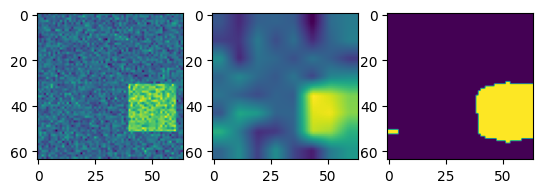

In [61]:
from source.vit import load_vit_visualizer
import matplotlib.pyplot as plt
import tensorflow as tf

vit_visualizer = load_vit_visualizer(
    image_size=d,
    patch_size=max([2, d // 8]),
    model_path=f'model/model{d}.h5'
)

x = make_image(rng, d, 4.).reshape(1, d, d, 1)
map = vit_visualizer(x)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(x[0, :, :, 0])
ax[1].imshow(map[0, :, :])
ax[2].imshow(map[0, :, :] > 0.6)

data = tf.reshape(x, [-1])
mask = tf.cast(tf.reshape(map > 0.6, [-1]), dtype=tf.float64)
eta = (mask / tf.reduce_sum(mask)) - ((1.0 - mask) / tf.reduce_sum(1.0 - mask))

eta_norm = tf.norm(eta)
stat = tf.tensordot(eta, data, axes=1) / (eta_norm)
print(stat.numpy())
